In [55]:
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.feature import daisy
from skimage.io import imshow
from PIL import Image
import torch
import torch.utils.data as data
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import os
import plotly
from sklearn.preprocessing import LabelEncoder
import time
import shutil
import pathlib
import itertools

In [26]:
data_dir = r"C:\Users\ethan\MachineLearningNotebooks\Weather-Conditions-Classification\data\Multi-class Weather Dataset"
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

filepaths_array = np.array(filepaths)
labels_array = np.array(labels)

print("File Paths:")
print(filepaths_array)
print("Labels:")
print(labels_array)

File Paths:
['C:\\Users\\ethan\\MachineLearningNotebooks\\Weather-Conditions-Classification\\data\\Multi-class Weather Dataset\\Cloudy\\cloudy1.jpg'
 'C:\\Users\\ethan\\MachineLearningNotebooks\\Weather-Conditions-Classification\\data\\Multi-class Weather Dataset\\Cloudy\\cloudy10.jpg'
 'C:\\Users\\ethan\\MachineLearningNotebooks\\Weather-Conditions-Classification\\data\\Multi-class Weather Dataset\\Cloudy\\cloudy100.jpg'
 ...
 'C:\\Users\\ethan\\MachineLearningNotebooks\\Weather-Conditions-Classification\\data\\Multi-class Weather Dataset\\Sunrise\\sunrise97.jpg'
 'C:\\Users\\ethan\\MachineLearningNotebooks\\Weather-Conditions-Classification\\data\\Multi-class Weather Dataset\\Sunrise\\sunrise98.jpg'
 'C:\\Users\\ethan\\MachineLearningNotebooks\\Weather-Conditions-Classification\\data\\Multi-class Weather Dataset\\Sunrise\\sunrise99.jpg']
Labels:
['Cloudy' 'Cloudy' 'Cloudy' ... 'Sunrise' 'Sunrise' 'Sunrise']


In [31]:
resized_images_PCA = []
resized_images_print = []
nn_array = []

def show_image(img):
    print("File Path:", filepaths_array[i])
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {labels_array[i]}")
    plt.axis('off')
    plt.show()

def load_and_process_image(file_path):
    size = (200,200)
    image = Image.open(file_path)
    resized_image = image.resize(size)
    return resized_image

def grayscale_image(image):
    gray_image = image.convert("L")
    return gray_image

for i in range(len(filepaths_array)):
    image = load_and_process_image(filepaths_array[i])
    grayscaled_image = grayscale_image(image)
    resized_image_array_PCA = np.array(grayscaled_image).flatten()
    resized_image_array_PCA = resized_image_array_PCA.astype(np.float32)/255.0
    resized_images_PCA.append(resized_image_array_PCA)

    resized_image_array_print = np.array(grayscaled_image)
    resized_images_print.append(resized_image_array_print)
    image = np.array(image)
    image = image/255.0
    nn_array.append(image)

resized_images_array_PCA = np.array(resized_images_PCA)
resized_images_array_print = np.array(resized_images_print)

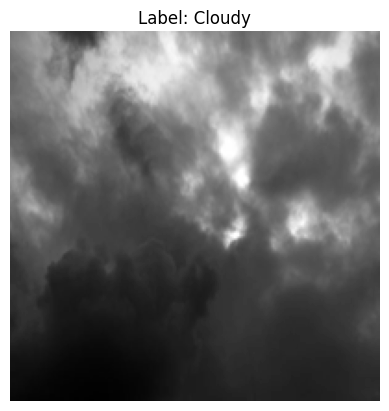

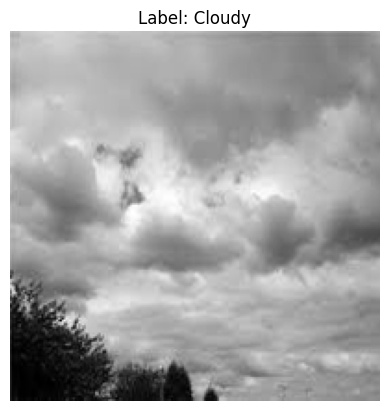

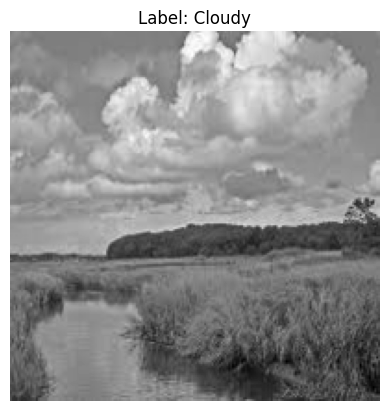

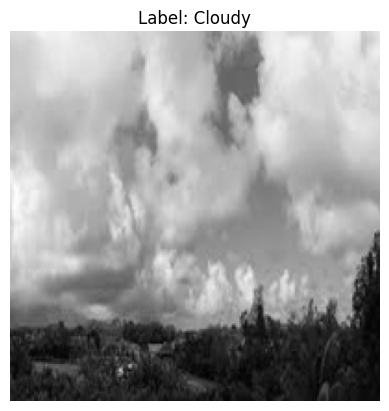

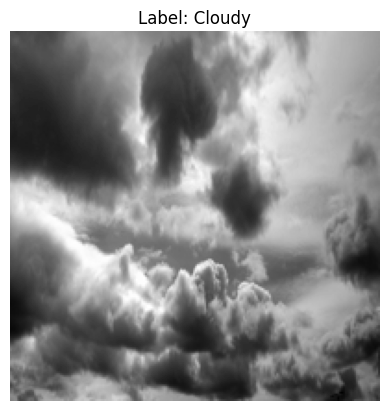

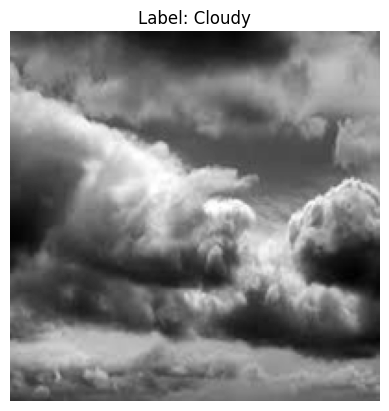

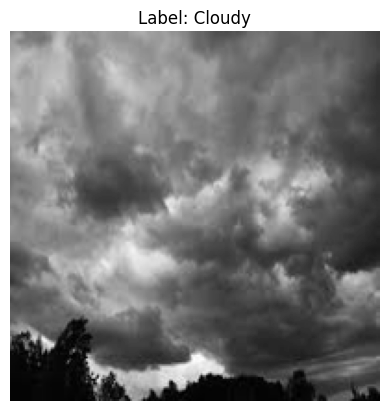

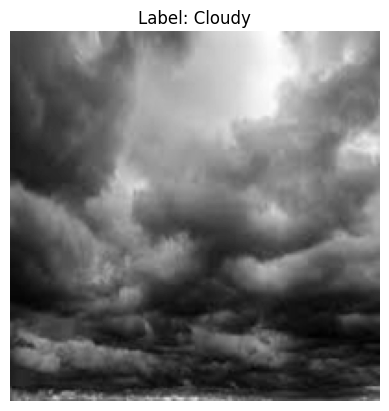

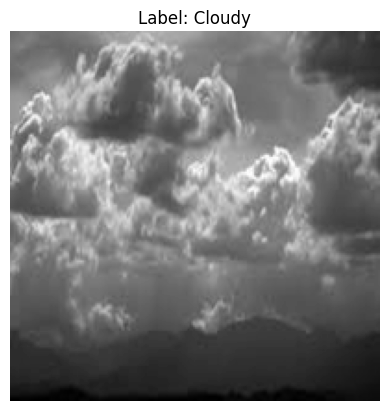

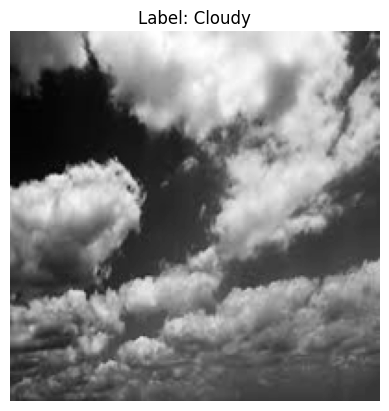

In [32]:
for i in range(10):
    img = resized_images_print[i]
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {labels_array[i]}")
    plt.axis('off')
    plt.show()

In [33]:
X = resized_images_array_PCA
print(resized_images_array_PCA.shape)
n_samples, h, w = resized_images_array_print.shape

(1125, 40000)


In [34]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenweather = pca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenfaces from 1125 faces
CPU times: total: 19.4 s
Wall time: 8.81 s


In [35]:
def plot_explained_variance(pca):
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
   



In [36]:
pca = PCA(n_components=300)
X_pca = pca.fit(X)
plot_explained_variance(pca)

In [37]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

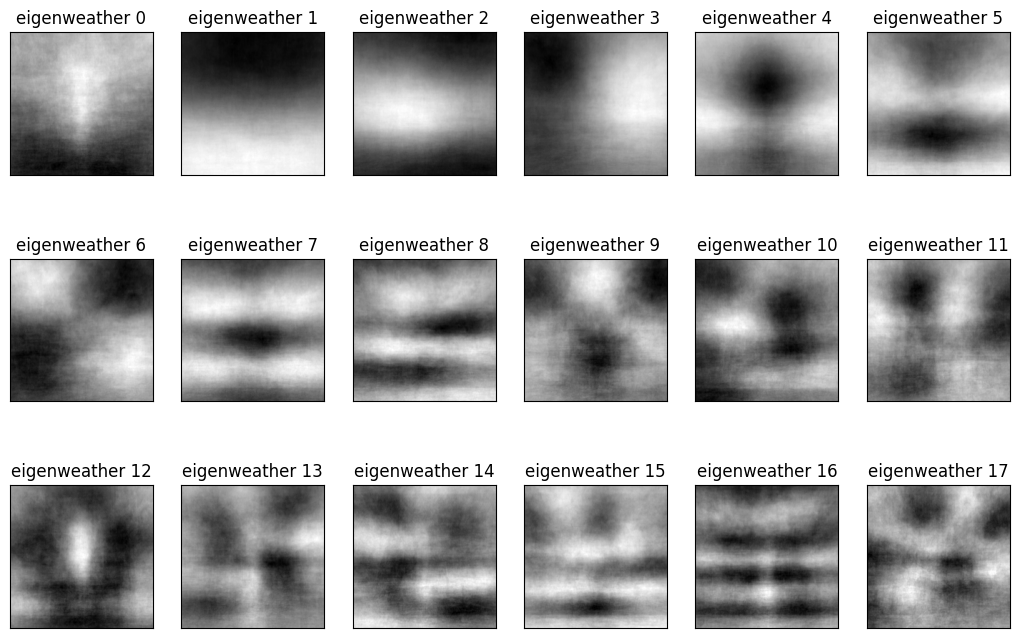

In [38]:
eigenweather_titles = ["eigenweather %d" % i for i in range(eigenweather.shape[0])]
plot_gallery(eigenweather, eigenweather_titles, h, w)

In [39]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 1    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

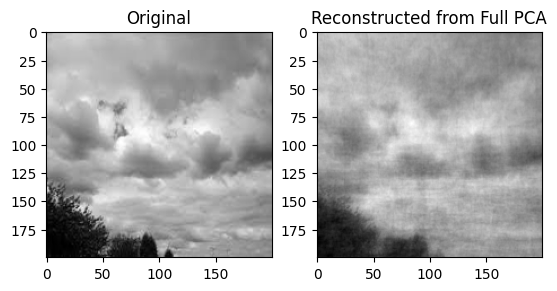

In [40]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

### Randomized PCA

In [41]:
# lets do some PCA of the features and go from 1850 features to 300 features

n_components = 300
print ("Extracting the top %d eigenweathers from %d weather images" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigenweathers = rpca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenweathers from 1125 weather images
CPU times: total: 15.4 s
Wall time: 5.92 s


In [42]:
plot_explained_variance(rpca)

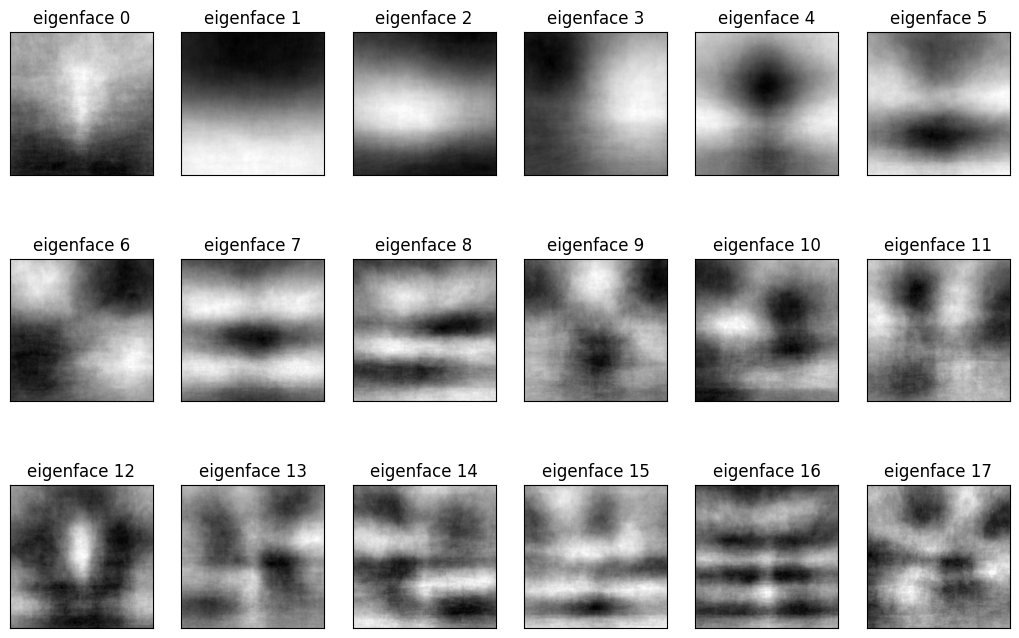

In [43]:
eigenweather_titles = ["eigenface %d" % i for i in range(eigenweathers.shape[0])]
plot_gallery(eigenweathers, eigenweather_titles, h, w)

In [44]:
import warnings
from ipywidgets import widgets  # make this interactive!
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)



def plt_reconstruct(idx_to_reconstruct):
    # this code is for reference only, it does not qualify as a neaarest neighbor search
    #  for your lab project. 
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    x_flat = X[idx_to_reconstruct].reshape(1, -1)
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))    
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(labels_array[idx_to_reconstruct]+f", {x_flat.shape[1]} elements")
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Full PCA, {n_components} elements")
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Randomized PCA, {n_components} elements")
    plt.grid(False)
    
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

interactive(children=(IntSlider(value=562, description='idx_to_reconstruct', max=1124), Output()), _dom_classe…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

### Image Feature: DAISY Bag of Features Model

In [45]:
# now let's understand how to use it
features = daisy(img, step=20, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(8, 8, 68)
4352


In [46]:
# create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=20, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

CPU times: total: 78.1 ms
Wall time: 164 ms


(4352,)

In [47]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: total: 35.7 s
Wall time: 1min 25s
(1125, 4352)


In [48]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: total: 156 ms
Wall time: 297 ms


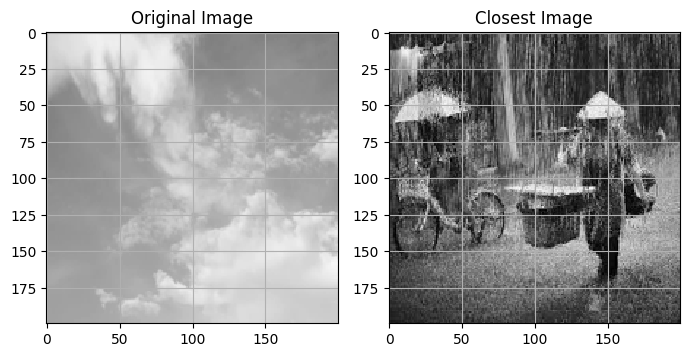

In [49]:
import copy
# find closest image to current image
idx1 = 30
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

Daisy is completely worthless for weather analysis because orientation isn't relevant. (Expand on this thought).

### K-Nearest Neighbors Classification

In [50]:
print(resized_images_array_PCA.shape)

(1125, 40000)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data (replace with your own data)
X = resized_images_array_PCA
y = labels_array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)  # You can adjust 'n_neighbors' as needed

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6311111111111111


### Using a Convulutional Neural Network for better classification

In [64]:
target_size = (200, 200)

# Initialize an empty list to store the resized images
resized_nn_array = []

for file_path in filepaths_array:
    image = Image.open(file_path)
    # Resize the image to the target size
    resized_image = image.resize(target_size)
    # Convert the image to a NumPy array
    image_array = np.array(resized_image)
    # Normalize the image data if needed (divide by 255.0)
    image_array = image_array / 255.0
    # Append the resized and normalized image to the list
    resized_nn_array.append(image_array)

# Convert the list of images into a NumPy array
nn_array = np.array(resized_nn_array)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (1125, 200, 200) + inhomogeneous part.

In [63]:
# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels_array)

# Split your dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(nn_array, numerical_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert your data into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define batch size for training
batch_size = 32

# Create data loaders for training and validation
train_dataset = data.TensorDataset(X_train, y_train)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = data.TensorDataset(X_val, y_val)
val_loader = data.DataLoader(val_dataset, batch_size=batch_size)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (1125, 200, 200) + inhomogeneous part.